# **CUSTOMER CHURN PREDICTION MODEL**

**Dataset Description: Bank Customer Churn Dataset**

This dataset contains information about bank customers and aims to predict whether a customer will churn (attrite) or continue their relationship with the bank. Each record represents a customer profile with demographic, account activity, and credit card usage details.

Target Variable: Attrition_Flag

Existing Customer → 0

Attrited Customer → 1

Number of Records: ~10,000

Number of Features: 20+ (after cleaning)

**Key Feature Categories:**

Demographics: Customer_Age, Gender, Dependent_count, Marital_Status, Income_Category

Credit Card Usage: Total_Trans_Amt, Total_Trans_Ct, Avg_Utilization_Ratio, Credit_Limit

Account Information: Total_Relationship_Count, Months_on_book, Total_Revolving_Bal

Behavioral Change Indicators: Total_Ct_Chng_Q4_Q1, Total_Amt_Chng_Q4_Q1

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


**Loading Dataset**

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Bankchurnes.csv to Bankchurnes (1).csv


In [44]:
df=pd.read_csv('Bankchurnes.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


 **DATA EXPLORATION**

In [4]:
df.shape

(10127, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
df.size

212667

In [7]:
#To get statistical Report
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [8]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

,0
Attrition_Flag,2
Gender,2
Marital_Status,4
Card_Category,4
Income_Category,6
Dependent_count,6
Total_Relationship_Count,6
Education_Level,7
Months_Inactive_12_mon,7
Contacts_Count_12_mon,7


### **DATA PRE_PROCESSING** **and EDA**

In [9]:
#checking null values
df.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


No null value presents

**Handling Outliers**

In [48]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", num_cols.tolist())

Numeric columns: ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [53]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, columns):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        before = len(df_clean)
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

# Apply function
df_clean = remove_outliers_iqr(df, num_cols)

print("\nOriginal shape:", df.shape)
print("Cleaned shape:", df_clean.shape)



Original shape: (10127, 21)
Cleaned shape: (6463, 21)


**Data Visualization**

/tmp/ipython-input-3288133514.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition_Flag', data=df_clean, palette=['skyblue', 'lightcoral'])


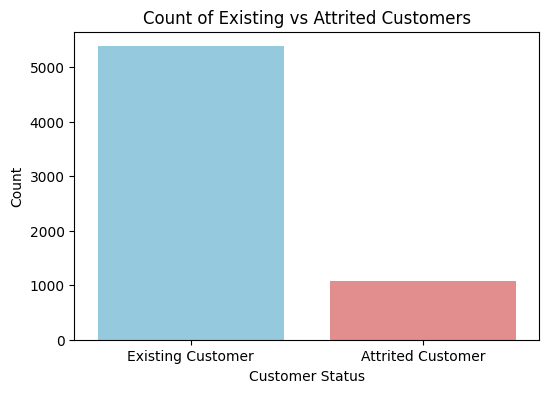

In [54]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Attrition_Flag', data=df_clean, palette=['skyblue', 'lightcoral'])
plt.title('Count of Existing vs Attrited Customers')
plt.xticks(ticks=[0,1], labels=['Existing Customer', 'Attrited Customer'])
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.show()


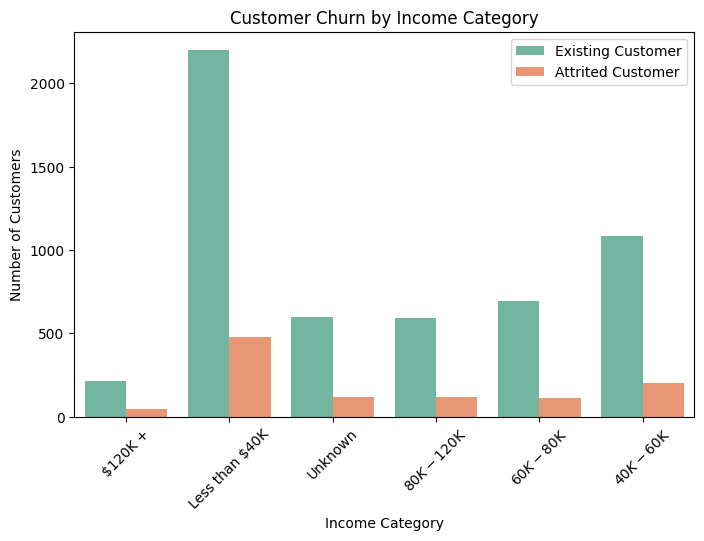

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='Income_Category', hue='Attrition_Flag', data=df_clean, palette='Set2')
plt.title('Customer Churn by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Number of Customers')
plt.legend(['Existing Customer', 'Attrited Customer'])
plt.xticks(rotation=45)
plt.show()

**Encoding the categorical value**

In [56]:
print(df_clean['Attrition_Flag'].unique())


['Existing Customer' 'Attrited Customer']


In [59]:
# Changing the Attrition_Flag to 0 and 1

df_clean['Attrition_Flag'] = df_clean['Attrition_Flag'].map({
    'Existing Customer': 0,
    'Attrited Customer': 1
})

In [60]:
df_clean.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,708790833,0,42,M,5,Uneducated,Unknown,$120K +,Blue,31,...,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
14,712396908,0,57,F,2,Graduate,Married,Less than $40K,Blue,48,...,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
19,709327383,0,45,F,2,Graduate,Married,Unknown,Blue,37,...,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
21,708508758,1,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
23,811604133,0,47,F,4,Unknown,Single,Less than $40K,Blue,36,...,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626


In [61]:
cat_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

In [62]:
#Encode categorical columns using One-Hot Encoding
df_encoded = pd.get_dummies(df_clean, columns=cat_cols, drop_first=True)

## **Splitting dataset into training and into testing set**

In [155]:
# Split into features (X) and target (y) using df_encoded
x = df_encoded.drop('Attrition_Flag', axis=1)
y = df_encoded['Attrition_Flag']

# Handling Class Imbalance using SMOTE

In [156]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [157]:
#Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

print("Before SMOTE:")
print(y_train.value_counts())

Before SMOTE:
Attrition_Flag
0    3766
1     758
Name: count, dtype: int64


In [158]:
 #Apply SMOTE on training data
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

print("\nAfter SMOTE:")
print(y_train_res.value_counts())


After SMOTE:
Attrition_Flag
0    3766
1    3766
Name: count, dtype: int64


**DATA MODELLING**


*   DECISION TREE
*   RANDOM FOREST


*   LOGISTIC REGRESSION







In [159]:
# --- Decision Tree ---
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train_res, y_train_res)
y_pred_dt = dt.predict(x_test)

# --- Random Forest ---
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_res, y_train_res)
y_pred_rf = rf.predict(x_test)

# --- Logistic Regression ---
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(x_train_res, y_train_res)
y_pred_lr = lr.predict(x_test)

**Performance Evaluations**

In [160]:
print("\n Decision Tree Report:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

print("\n Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\n Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


 Decision Tree Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1614
           1       0.73      0.84      0.78       325

    accuracy                           0.92      1939
   macro avg       0.85      0.89      0.87      1939
weighted avg       0.93      0.92      0.92      1939

Accuracy: 0.9205776173285198

 Random Forest Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1614
           1       0.83      0.86      0.84       325

    accuracy                           0.95      1939
   macro avg       0.90      0.91      0.91      1939
weighted avg       0.95      0.95      0.95      1939

Accuracy: 0.9468798349664775

 Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1614
           1       0.47      0.80      0.59       325

    accuracy                           0.82   

**Top 10 influencing features**

/tmp/ipython-input-1008289627.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')


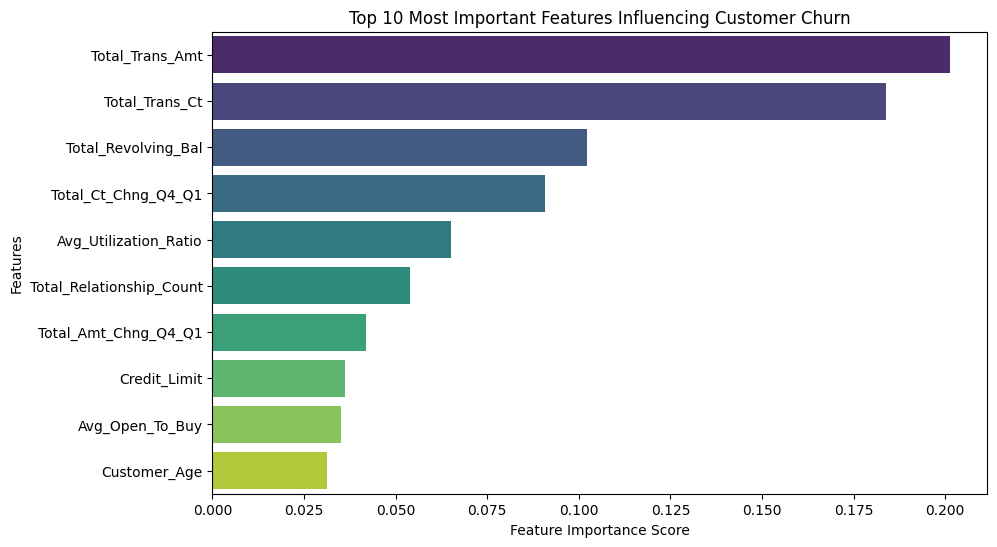

In [154]:
feature_names = X.columns

# Feature importance
importances = classifier.feature_importances_

# Create DataFrame for visualization
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title("Top 10 Most Important Features Influencing Customer Churn")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

Transactional behavior (Total_Trans_Amt, Total_Trans_Ct, and their quarterly changes) is the strongest predictor of churn.

Engagement level (relationship count, credit utilization) also has a clear impact.

Static demographic features (like age, gender, education) are less influential compared to behavioral features that indicate activity and product usage.

**Since this is a churn prediction problem:**

The positive class (1) = Attrited Customers → the customers we most care about detecting.

So, recall and f1-score for class 1 are more important than overall accuracy.
(Because missing an attrited customer is worse than wrongly flagging a loyal one.)

**Best Model → Random Forest**

**Why:**

Highest F1-score (0.84) → best overall balance between detecting churners (recall) and minimizing false alarms (precision).

Excellent accuracy (95%) → good general performance on unseen data.

Recall (0.86) is strong → it identifies most churned customers.

Less overfitting compared to Decision Tree (smaller train-test gap).

Works well even with SMOTE-balanced data.